**Problem statement**
   -Predicting the probability that somebody will experience financial distress in the next two years.which can make banks a       guess at the probability of default, are use to determine whether or not a loan should be granted.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
sampleEntry = pd.read_csv('sampleEntry.csv')
train = pd.read_csv('cs-training.csv')
test = pd.read_csv('cs-test.csv')

In [3]:
#dimension of the data
print(train.shape)
print(test.shape)

(150000, 12)
(101503, 12)


The dataset cantains **12** features  along with **150000** observations.

The description for the 12 features is given below: <br>
Variable Name	Description	Type
- ``SeriousDlqin2yrs``	Person experienced 90 days past due delinquency or worse	Y/N
- ``RevolvingUtilizationOfUnsecuredLines``	Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits	percentage
- ``age``	Age of borrower in years	integer
- ``NumberOfTime3059DaysPastDueNotWorse``	Number of times borrower has been 30-59 days past due but no worse in the last 2 years.	integer
- ``DebtRatio``	Monthly debt payments, alimony,living costs divided by monthy gross income	percentage
- ``MonthlyIncome``	Monthly income	real
- ``NumberOfOpenCreditLinesAndLoans``	Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)	integer
- ``NumberOfTimes90DaysLate``	Number of times borrower has been 90 days or more past due.	integer
- ``NumberRealEstateLoansOrLines``	Number of mortgage and real estate loans including home equity lines of credit	integer
- ``NumberOfTime60-89DaysPastDueNotWorse``	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.	integer
- ``NumberOfDependents``	Number of dependents in family excluding themselves (spouse, children etc.)	integer

In [4]:
#getting first five observations
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
#getting first five observations 
test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [9]:
#describing train data
train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


**checking null values**

In [7]:
print(train.isnull().sum())

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [8]:
print(test.isnull().sum())

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64


**Checking unique items in each column**

In [90]:
train.nunique()

Unnamed: 0                              150000
SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13595
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

**Imputing Null values**

In [10]:
train['MonthlyIncome'].fillna(train['MonthlyIncome'].mean(),inplace=True)

In [11]:
train['NumberOfDependents'].fillna(train['NumberOfDependents'].mode()[0], inplace=True)

In [13]:
test['MonthlyIncome'].fillna(test['MonthlyIncome'].mean(),inplace=True)

In [14]:
test['NumberOfDependents'].fillna(test['NumberOfDependents'].mode()[0], inplace=True)

In [15]:
print(train.isnull().sum())

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [16]:
print(test.isnull().sum())

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64


**classes in Target variable**

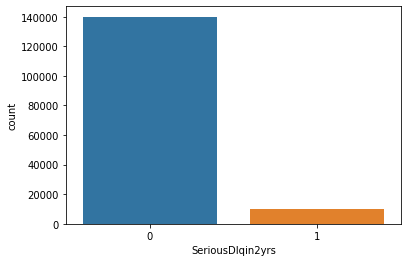

In [154]:
#plot two tyep classe "0" and "1"
sns.countplot(x='SeriousDlqin2yrs',data=train)
plt.show()

**correlation**

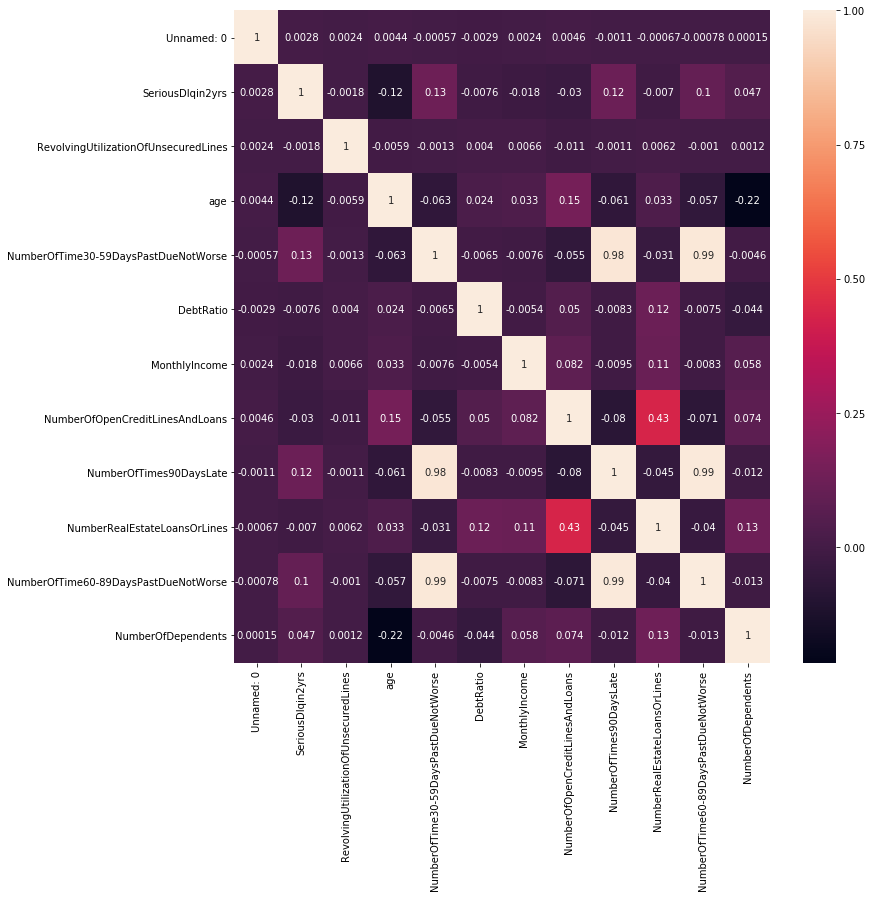

In [17]:
cor=train.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,ax=ax)

In [60]:
X = train.drop('SeriousDlqin2yrs',1)
y = train['SeriousDlqin2yrs']

In [38]:
train.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

**Splitting Data**

In [39]:
from sklearn.model_selection import train_test_split

In [75]:
#splitting data into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=568)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(120000, 11)
(30000, 11)
(120000,)
(30000,)


**XGBOOST**

In [132]:
from xgboost import XGBClassifier

In [97]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [133]:
xgb = XGBClassifier(n_jobs=-1) 
 
# Use a grid over parameters of interest
param_grid = {
                  'n_estimators' :[100,150,200,250,300],
                  "learning_rate" : [0.001,0.01,0.0001,0.05, 0.10 ],
                  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3 ],
                  "colsample_bytree" : [0.5,0.7],
                  'max_depth': [3,4,6,8]
              }

In [134]:
xgb_randomgrid = RandomizedSearchCV(xgb, param_distributions=param_grid, cv=5)

In [100]:
%%time
xgb_randomgrid.fit(X_train,y_train)

Wall time: 17min 36s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [102]:
best_est = xgb_randomgrid.best_estimator_

In [135]:
y_pred = best_est.predict_proba(X_train)
y_pred = y_pred[:,1]

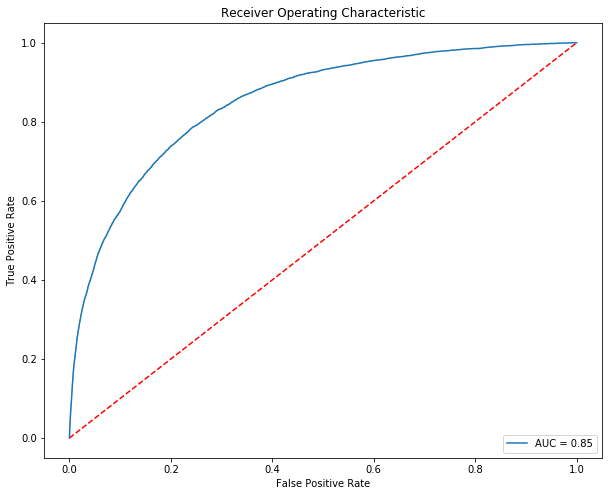

In [136]:
fpr,tpr,_ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [110]:
y_test=best_est.predict_proba(X_test)
y_test= y_test[:,1]

In [111]:
print(y_test)

[0.06126771 0.126676   0.02241398 ... 0.00726007 0.07372536 0.0469184 ]


In [112]:
sampleEntry["Probability"]=y_test
sampleEntry.head()

,Id,Probability
0,1,0.061268
1,2,0.126676
2,3,0.022414
3,4,0.086348
4,5,0.153962


In [113]:
sampleEntry.to_csv("submission4.csv",index=False)

**Random Forest using SMOTE**

In [92]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [93]:
smote = SMOTE(random_state=0)

os_data_X,os_data_y=smote.fit_sample(X_train,y_train)

In [115]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 100, 150],
           "max_depth" : [2,3,5,7,9],
           "min_samples_leaf" : [2, 4]}

In [117]:
rfc_randomgrid = RandomizedSearchCV(rfc, param_distributions=param_grid, cv=5)

In [118]:
rfc_randomgrid.fit(os_data_X,os_data_y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [121]:
best_est1 = rfc_randomgrid.best_estimator_

In [125]:
y_pred1 = best_est1.predict_proba(X_train)
y_pred1 = y_pred1[:,1]

In [126]:
y_test1=best_est1.predict_proba(X_test)
y_test1= y_test1[:,1]

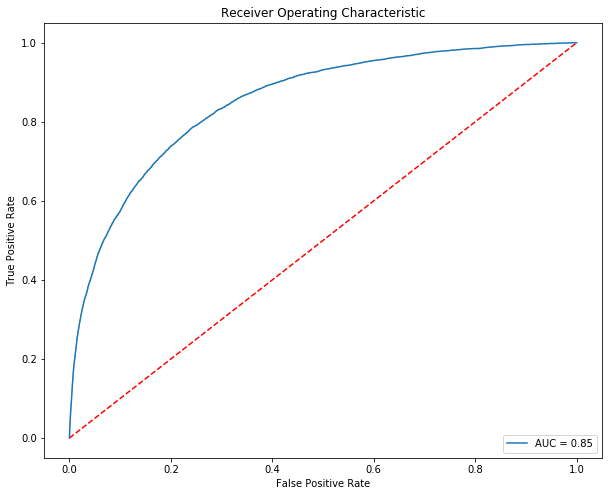

In [131]:
from sklearn.metrics import auc,roc_curve
fpr,tpr,_ = roc_curve(y_train, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [127]:
sampleEntry["Probability"]=y_test1
sampleEntry.head()

,Id,Probability
0,1,0.515910
1,2,0.421496
2,3,0.108698
3,4,0.365246
4,5,0.562385


In [128]:
sampleEntry.to_csv("submission5.csv",index=False)

**KNN_model**

In [137]:
from sklearn.neighbors import KNeighborsClassifier

In [138]:
knn = KNeighborsClassifier(n_neighbors=3)

In [139]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [140]:
y_pred2 = knn.predict_proba(X_train)
y_pred2 = y_pred2[:,1]

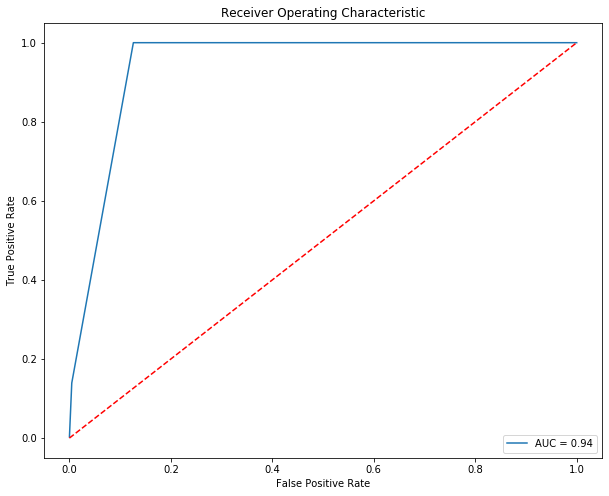

In [141]:
fpr,tpr,_ = roc_curve(y_train, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [142]:
md_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

In [143]:
KNN_GridSearch = GridSearchCV(md_KNN,param_grid=param_grid,cv=10)

In [144]:
KNN_GridSearch.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [147]:
best_est2=KNN_GridSearch.best_estimator_

In [149]:
y_pred3 = best_est2.predict_proba(X_train)
y_pred3 = y_pred3[:,1]

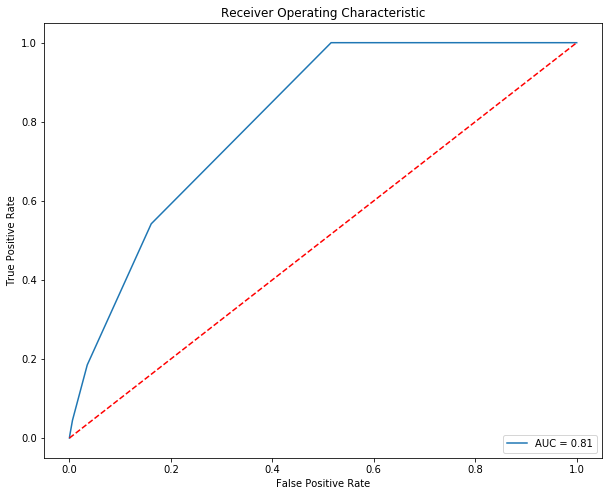

In [150]:
fpr,tpr,_ = roc_curve(y_train, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [151]:
y_test2=best_est2.predict_proba(X_test)
y_test2= y_test2[:,1]

In [152]:
sampleEntry["Probability"]=y_test2
sampleEntry.head()

,Id,Probability
0,1,0.166667
1,2,0.083333
2,3,0.000000
3,4,0.000000
4,5,0.083333


In [153]:
sampleEntry.to_csv("submission6.csv",index=False)

**Conclusion**

So, we have seen that AUC for  XGboost is around 85%  and also achieved score of 0.86 which is very close to 1 . Therefore, it is inferred that XGBoost is the suitable model for this dataset.SMOTE using with Random forest achieved a score of 0.85 which is also preferable.As KNN is performng well for train and slight deforming for test data getting a score of 0.5.